<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/02_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Although the example is very simple, it shows many of the concepts needed for compex deep learning problems. The main advantage is that it can be illustrated.

Our machine will "learn" the function that maps one sets of numbers to another one: for example given a new one that it hasn't seen before, ir correctly predicts the result.

In other words the regression task is: **given a specific value of input x, predict the corresponding value of output y.**

For this example we assume the relationship between the inputs and the outputs that the machine has to learn is a **linear** function.

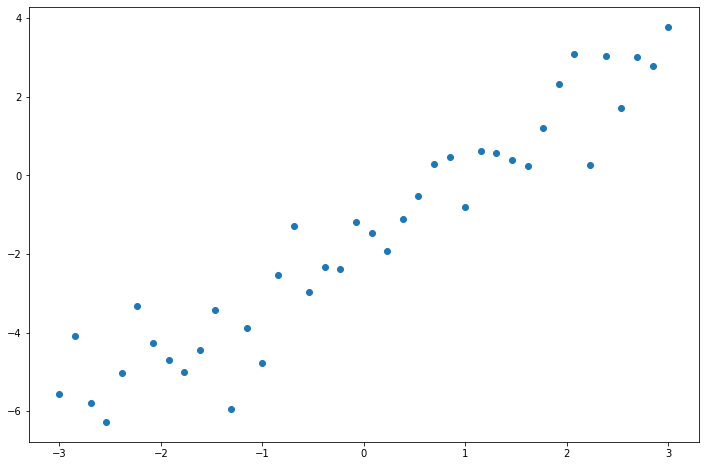

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

m = 40  # No. of points to generate
train_slope  = 1.5
train_offset = -1.5

# Generate training data
train_x = np.linspace(-3, 3, m)
rng = np.random.RandomState(seed=28)
train_y = train_slope * train_x + train_offset + rng.standard_normal(size=len(train_x))

# Plot the data
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(train_x, train_y, 'o');
plt.show()

Define two Python functions that represent a hypothesis (a straight line parameterized by slope and offset) and a cost function (the mean squared error) for linear regression.

The **hypothesis** is a mathematical formula that calculates the predicted outputs from the given inputs. The hypothesis is also known as a *model* (this is extremely simplistic model)

Slope and offset are **trainable parameters**, that means those parameters need to be learned.


In [ ]:
# Define functions hypothesis and cost
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y )) / 2.0

The **cost** function calculates the MSE and it can be shown in the following image.

The cost function sometimes is referred as loss, objective, energy, fitness function (depending on the domain).

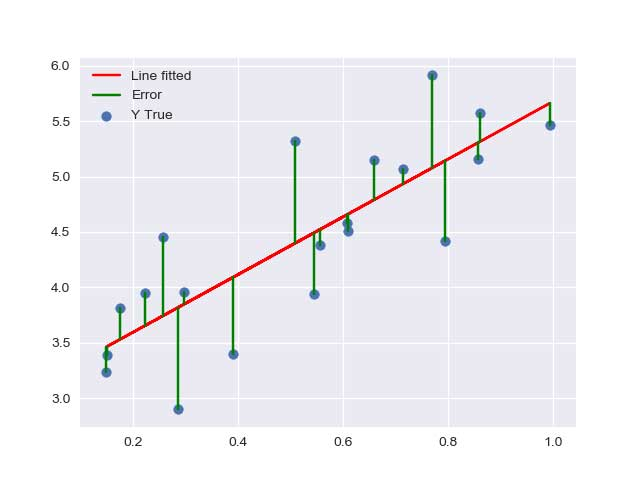

In the above case the red line is the hypothesis (our model) and the green lines express the individual error for every Y.

If we plot the cost as a function of the slop and offset we have something similar to the image below:

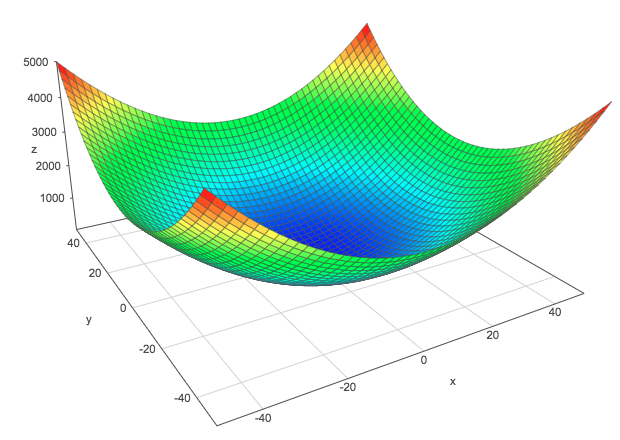

The goal of mathematical optimization is to find values for the parameters that minimise the value of the cost function.

The above problem is easy to solve because the minima is easy to find (at the bottom of the bowl shape)

For more complex cases the gradient descend is a more scalable solution: starting from a random poin on the surface, moves downhill until it can't go any lower. This is the minimum of the cost function.

The following code shows an implementation of the gradiend descend by calling the two function that calculate the derivative of the cost function with respect of the two parameters.

The algorithm print out the cost at each step and continue training until the cost reaches a stable value.

Cost at step 0 = 4.677, slope=0.120, offset=-0.050
Cost at step 1 = 4.527, slope=0.161, offset=-0.029
Cost at step 2 = 4.456, slope=0.169, offset=-0.051
Cost at step 3 = 4.405, slope=0.177, offset=-0.063
Cost at step 4 = 4.336, slope=0.186, offset=-0.085
Cost at step 5 = 4.317, slope=0.187, offset=-0.096
Cost at step 6 = 4.309, slope=0.182, offset=-0.114
Cost at step 7 = 4.311, slope=0.182, offset=-0.115
Cost at step 8 = 4.308, slope=0.182, offset=-0.114
Cost at step 9 = 4.182, slope=0.217, offset=-0.101
Cost at step 10 = 4.128, slope=0.222, offset=-0.123
Cost at step 11 = 3.899, slope=0.286, offset=-0.100
Cost at step 12 = 3.920, slope=0.280, offset=-0.103
Cost at step 13 = 3.904, slope=0.279, offset=-0.117
Cost at step 14 = 3.863, slope=0.286, offset=-0.127
Cost at step 15 = 3.272, slope=0.424, offset=-0.181
Cost at step 16 = 3.241, slope=0.435, offset=-0.175
Cost at step 17 = 3.042, slope=0.477, offset=-0.217
Cost at step 18 = 2.887, slope=0.514, offset=-0.242
Cost at step 19 = 2.87

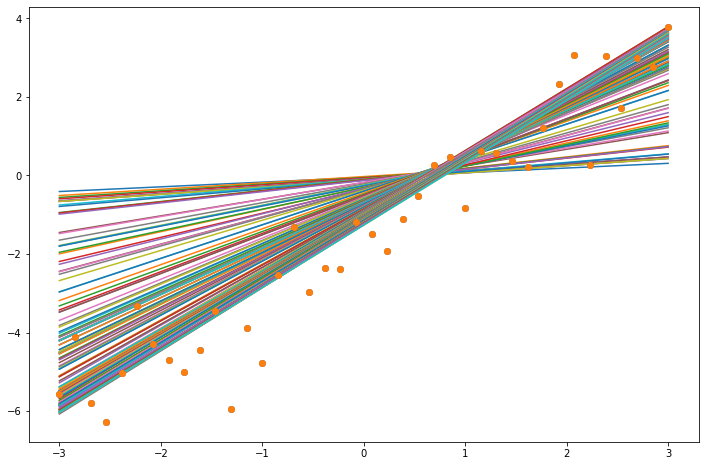

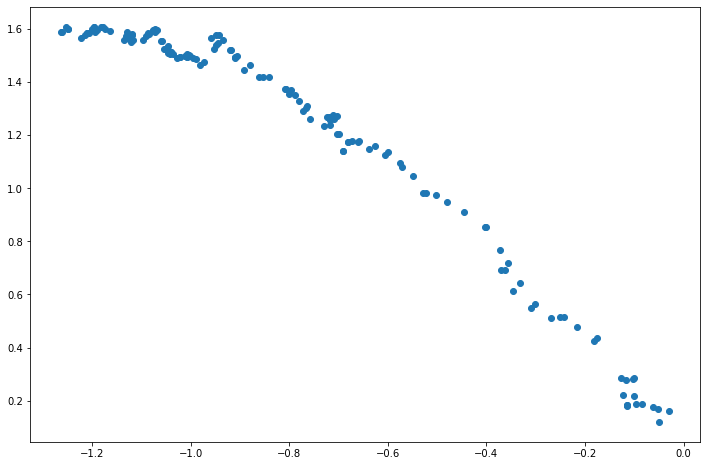

In [ ]:
def hypothesis(x, slope, offset):
    return slope * x + offset

def cost(x, slope, offset, y):
    return np.mean(np.square(hypothesis(x, slope, offset) - y)) / 2.0

# Define two Python functions that calculate the partial derivatives of the cost
# function with respect to the two parameters slope and offset.
def derivative_wrt_slope(x, y):
    return np.mean((hypothesis(x, slope, offset) - y) * x)

def derivative_wrt_offset(x, y):
    return np.mean((hypothesis(x, slope, offset) - y))


num_steps = 150
learning_rate = 0.01
slope  = 0
offset = 0

slope_at_step  = np.empty((num_steps))
offset_at_step = np.empty((num_steps))
plt.rcParams["figure.figsize"] = (12, 8)

for step in range(num_steps):
    k = np.random.randint(m)
    x = train_x[k]
    y = train_y[k]
    
    # Update learned parameter values
    new_slope  = slope  - learning_rate * derivative_wrt_slope(x, y)
    new_offset = offset - learning_rate * derivative_wrt_offset(x, y)

    slope  = new_slope
    offset = new_offset
    
    slope_at_step[step] = slope
    offset_at_step[step] = offset
    
    print('Cost at step {} = {:5.3f}, slope={:5.3f}, offset={:5.3f}'.format(step, cost(train_x, slope, offset, train_y), slope, offset))
    plt.plot(train_x, slope * train_x + offset)

plt.plot(train_x, train_y, 'o');
plt.plot(train_x, train_y, 'o');
plt.show()

plt.scatter(offset_at_step, slope_at_step)
plt.show()

# Logistic Regression

Logistic regression is a regression model where the output is categorical: instead of predicting a value the model predicts a category of the input data.
It is basically a classification task.

In this example we have 2 features (coordinates of the point on a plane) and a classification (red, blue and green). We need to train the model so it can predict the color of a new point

## One-Hot Labels

Each category is represented by a label represented by *one-hot encoded* data. It means they are vectors where their size is the same of the total amount of the categories and there is a single 1 at the position of the given category. Hence one and only one element is *"hot"*.

This is done in order to avoid any bias (compared in using integers).

The model (or hypothesis) now has:
* 2 inputs (x)
* 3 outputs (y)
* 9 trainable parameters (6 weights and 3 biases)

The image below shows what's going on in the model:

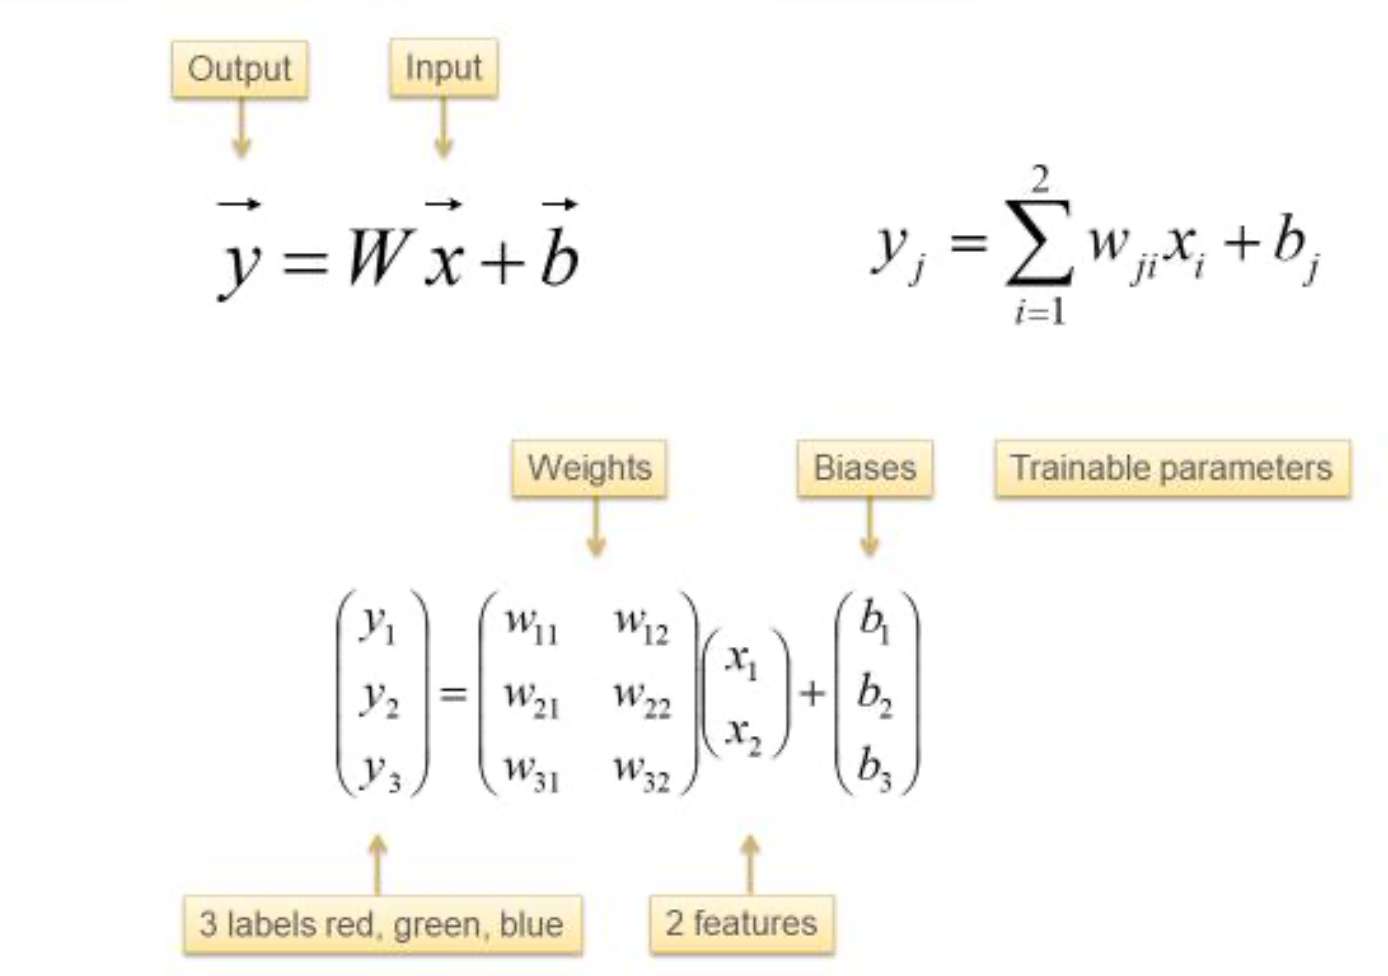



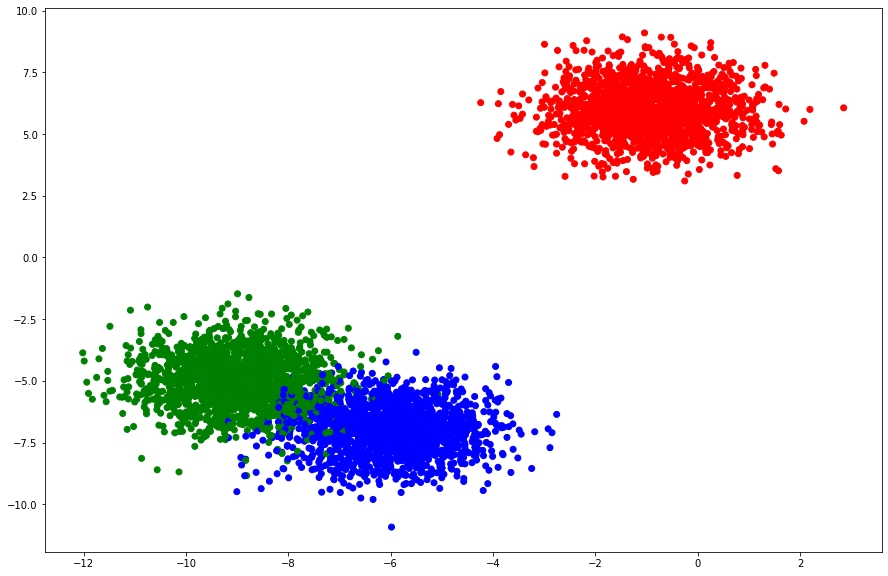

In [19]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate the dataset

m          = 5000 # The number of  points in the dataset
n_features = 2    # The 2 dimensions of each training data point
n_labels   = 3    # The categories shown as red, green, and blue

rng = np.random.RandomState(seed=42)  # Seed the random number generator

x = np.array((rng.standard_normal(m), rng.standard_normal(m)))
x = np.transpose(x)
y = np.empty((m))

for i in range(n_labels):
   x[i*m//n_labels:(i+1)*m//n_labels,0] += rng.randint(-10,+10)
   x[i*m//n_labels:(i+1)*m//n_labels,1] += rng.randint(-10,+10)
   y[i*m//n_labels:(i+1)*m//n_labels] = i

# Create the one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

# Shuffle the training data samples prior to training to ensure that the order
# of the samples does not bias the training
indices = np.arange(m)
random.shuffle(indices)

train_x = np.empty((m,n_features)).astype(np.float32)
train_y = np.empty((m,n_labels)).astype(np.float32)

c = []  # List to hold the color of each data point in the plot

for i in range(m):
    train_x[i] = x[indices[i]]
    train_y[i] = y[indices[i]]
    if train_y[i,0] == 1:
        c.append('r')
    elif train_y[i,1] == 1:
        c.append('g')
    else:
        c.append('b')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

The **cost** function should calculate a number that represents the distance between the predicted output and the ground thruth across the entire training dataset: the average error.

The prediction should have the same shape and size of the labels so that we can compare them: each prediction is a vector of 3 floating-point numbers. We want to convert those numbers into probabilities and this can be done using the **softmax** function.

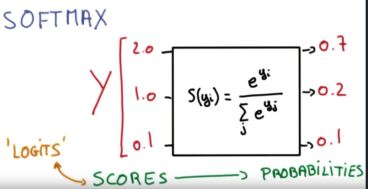

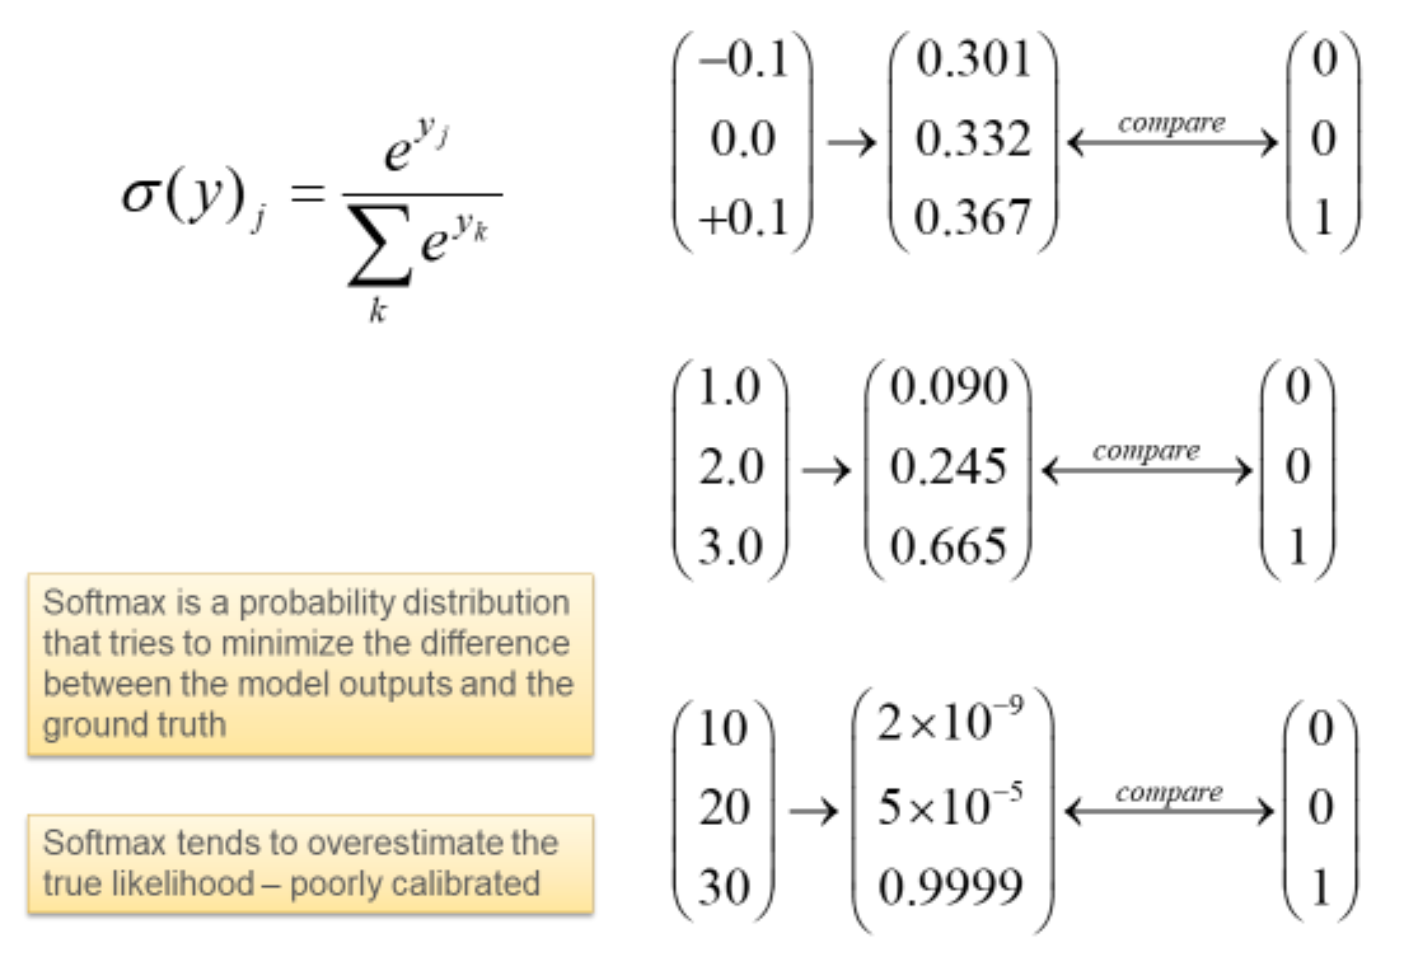

The last stage is to compare the softmax probabilities with the labels and this can be done using **cross-entropy function**.

It takes the dot product of the label vector with the negative log of the softmax vector. If the probability of a given label is close to 1.0 the cost will be to 0.0. Viceversa, is the probability of a given label is close to 0.0 the cost will be tending to +infinity.

The finale network is something like the image below. 

NOTE: this is not a deep neural network (there is no hidden layer)

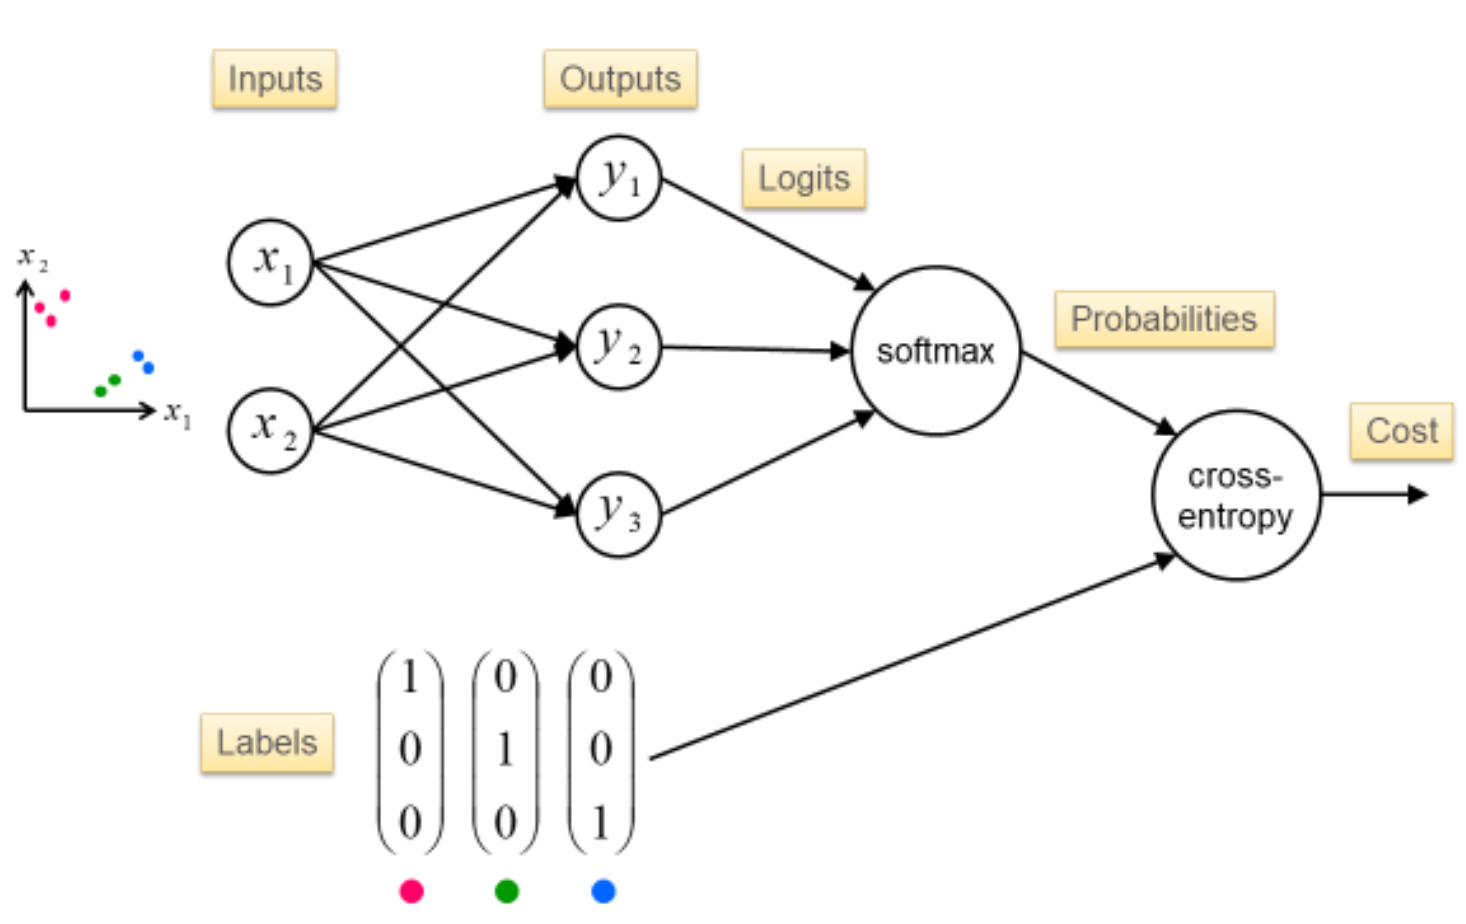





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Loss at step  500 = 0.085, acc = 0.972
Loss at step 1000 = 0.078, acc = 0.972
Loss at step 1500 = 0.076, acc = 0.972
Loss at step 2000 = 0.075, acc = 0.973
Loss at step 2500 = 0.074, acc = 0.973
Loss at step 3000 = 0.074, acc = 0.972
Loss at step 3500 = 0.074, acc = 0.972
Loss at step 4000 = 0.073, acc = 0.972
Loss at step 4500 = 0.073, acc = 0.972
Loss at step 5000 = 0.073, acc = 0.973


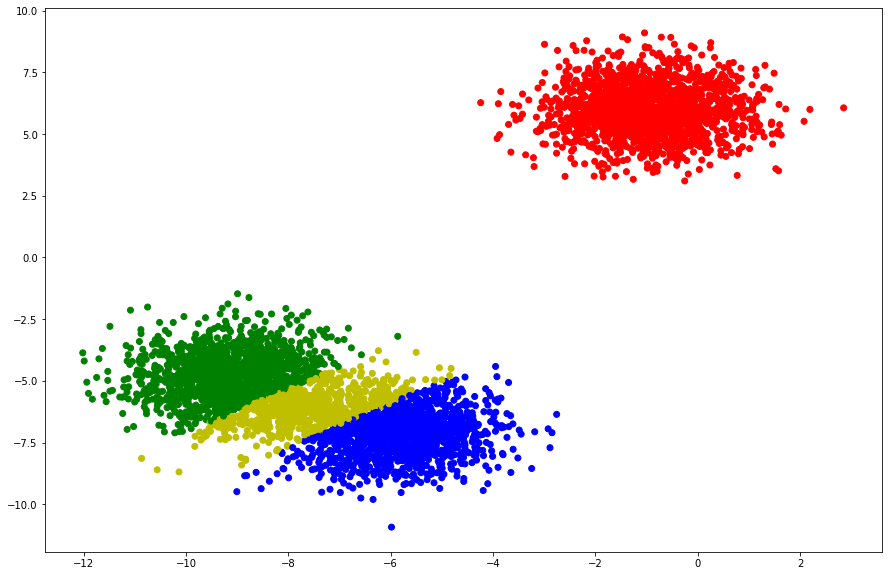

In [20]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

model = Sequential()
# units is the output
model.add(Dense(input_shape=(2,), units=3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

n_steps = 5000

for step in range(n_steps//10,n_steps+1,n_steps//10):
    model.fit(train_x,
              train_y,
              epochs=n_steps//10,
              batch_size=m,
              verbose=0)
    
    loss_and_acc = model.evaluate(train_x,
                                  train_y,
                                  batch_size=m,
                                  verbose=0)
    
    print('Loss at step {:4} = {:5.3f}, acc = {:5.3f}'.format(step, *loss_and_acc))

prediction = model.predict(train_x, batch_size=m)

threshold = 0.95

c = [None]*m

for i in range(m):
    ix = np.argmax(prediction[i,:])   # The color with the highest probability
    c[i] = ('r', 'g', 'b')[ix]
    if prediction[i,ix] < threshold:
        c[i] = 'y'
    
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()


In the following piece of code we will plot the decision boundary of the whole graph.

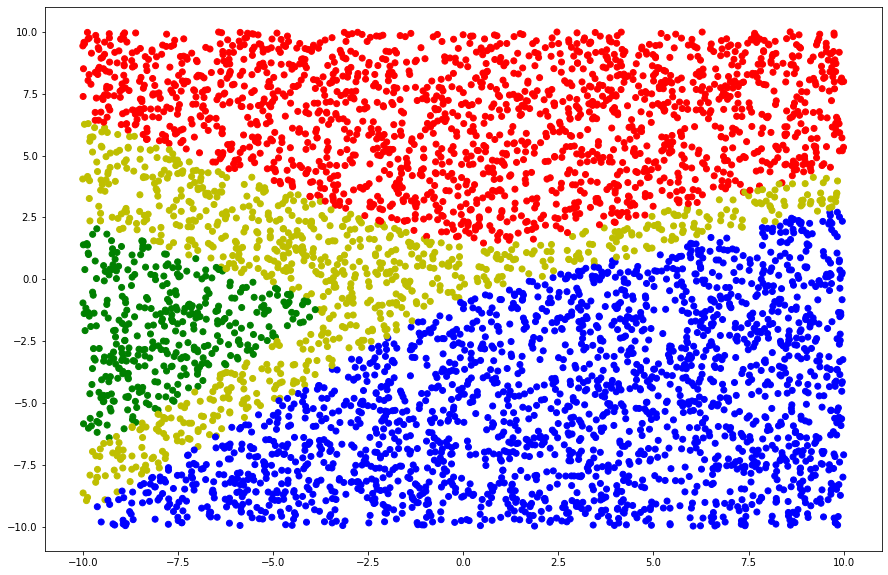

In [23]:
# Test data
test_m = 5000
test_x = (np.random.random((test_m,n_features)).astype(np.float32) - 0.5) * 20.0

prediction = model.predict(test_x, batch_size=test_m)

c = [None for i in range(test_m)]

threshold = 0.95

# Color each test point according to the label with the highest probability
for i in range(test_m):
    x = np.argmax(prediction[i,:])
    c[i] = ('r', 'g', 'b')[x]
    if prediction[i,x] < threshold:
        c[i] = 'y'
        
plt.scatter(test_x[:,0], test_x[:,1], color=c)
plt.show()